# CLASSIFICATION(**SINIFLANDIRMA**)

In [83]:
import pandas as pd
import numpy as np

In [125]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/myinsurance.csv")
veriler

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [126]:
# "sütun_adı" sütununda kaç farklı eleman olduğunu bulun
farkli_eleman_sayisi = veriler["region"].nunique()

# Sonucu yazdırın
print("Sütunda", farkli_eleman_sayisi, "farklı eleman bulunmaktadır.")

Sütunda 4 farklı eleman bulunmaktadır.


In [127]:
#KORELASYON İLİŞKİLERİ
corr_matrix = veriler.corr()
def en_yuksek_iliskiler(corr_matrix):
    # Korelasyon matrisini sütunlara göre sıralama
    sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

    # Sıralanmış korelasyon değerlerinin en yüksek olduğu sütun ikililerini yazdırma
    for i, (s1, s2) in enumerate(sorted_corr.index):
        if s1 != s2:  # Aynı sütun ikilisini tekrarlamamak için
            print(f"{s1}-{s2}: {sorted_corr[i]}")

# Örnek kullanım
en_yuksek_iliskiler(corr_matrix)

age-charges: 0.299008193330648
charges-age: 0.299008193330648
bmi-charges: 0.19834096883362912
charges-bmi: 0.19834096883362912
age-bmi: 0.1092718815485351
bmi-age: 0.1092718815485351
children-charges: 0.06799822684790495
charges-children: 0.06799822684790495
age-children: 0.04246899855884958
children-age: 0.04246899855884958
bmi-children: 0.012758900820673994
children-bmi: 0.012758900820673994


<ipython-input-127-b4fccfc7c866>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = veriler.corr()


In [86]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data


def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)  # Düzeltme: dataForOneHot kullanılmalı
    result = fill_nan_with_mean(dataForOneHot)
    return result

In [143]:
veriSetim=pd.read_csv("/content/myinsurance.csv")
veriOnİslemeliSetDuzelt=veriOnIsleme(veriSetim, ["smoker"], ["age","bmi","children","charges"])
#veriOnİslemeliSetDuzelt=veriOnİslemeliSetDuzelt.drop(["RowNumber","CustomerId","Surname", "Geography", "Gender"], axis=1)

MyX = veriOnİslemeliSetDuzelt.drop(["region","sex"],axis=1)
MyY = veriOnİslemeliSetDuzelt["region"]

#BURADA Y DEĞERLERİ YES/NO ŞEKLİNDE OLDUĞU İÇİN 1/0  yada 0-1-2 ŞEKLİNE ÇEVİRDİM
from sklearn.preprocessing import LabelEncoder
# Encode target variable
le = LabelEncoder()
MyY = le.fit_transform(MyY)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [144]:
#Geriye Eleme Yöntemi

import statsmodels.api as sm
import pandas as pd

def backward_elimination(X, y, significance_level=0.05):
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model.summary()

In [145]:
# Fonksiyonu çağırma (hedef sütun adı "target" olarak varsayılmıştır)
summary = backward_elimination(MyX, MyY)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              453.8
Date:                Fri, 07 Jul 2023   Prob (F-statistic):                   1.16e-284
Time:                        14:08:37   Log-Likelihood:                         -2074.9
No. Observations:                1338   AIC:                                      4160.
Df Residuals:                    1333   BIC:                                      4186.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [88]:
MyX

,age,bmi,children,charges,sex_male,smoker_yes
0,0.021739,0.321227,0.0,0.251611,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0
...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,1.0,0.0
1334,0.000000,0.429379,0.0,0.017305,0.0,0.0
1335,0.000000,0.562012,0.0,0.008108,0.0,0.0
1336,0.065217,0.264730,0.0,0.014144,0.0,0.0


In [89]:
MyY

array([3, 2, 2, ..., 2, 3, 1])

In [90]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [91]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

Logistic **Regression**

In [92]:
#BURADA Y DEĞERLERİ YES/NO ŞEKLİNDE OLDUĞU İÇİN 1/0 ŞEKLİNE ÇEVİRDİM
#from sklearn.preprocessing import LabelEncoder
# Encode target variable
#le = LabelEncoder()
#MyY_train_encoded = le.fit_transform(MyY_train)
#MyY_test_encoded = le.transform(MyY_test)
#MyY_train=MyY_train_encoded
#MyY_test=MyY_test_encoded

In [93]:
#Lojistik Regresyon
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=(42))
logr.fit(MyX_train, MyY_train)
y_predLogistic=logr.predict(MyX_test)
cm=confusion_matrix(MyY_test,y_predLogistic)
print("Logistic R. confısuon matrix")
print(cm)

Logistic R. confısuon matrix
[[22  7 21  7]
 [34  8 23  4]
 [12  6 55  8]
 [19  7 27  8]]


In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
def calculate_metrics_binary(y_true, y_pred):
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred)

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    return f1, precision, sensitivity, specificity, roc_auc, fpr, tpr

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred, average='weighted')

    # Calculate specificity
    unique_labels = set(y_true)
    specificity = {}
    for label in unique_labels:
        true_negatives = sum((y_true != label) & (y_pred != label))
        false_positives = sum((y_true != label) & (y_pred == label))
        specificity[label] = true_negatives / (true_negatives + false_positives)

    return f1, precision, sensitivity, specificity

In [96]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    total_predictions = len(y_true)

    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

In [97]:
# LOGISTIC REGRESSİON METRİCS

f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_predLogistic)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyLG=calculate_accuracy(MyY_test, y_predLogistic)
print("Accuracy",accuracyLG)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predLogistic)
r2 = r2_score(MyY_test, y_predLogistic)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predLogistic)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.3094496168560239
Precision: 0.3267137901080258
Sensitivity (Recall): 0.34701492537313433
Specificity: {0: 0.6919431279620853, 1: 0.8994974874371859, 2: 0.6203208556149733, 3: 0.9082125603864735}
Accuracy 0.34701492537313433
Mean Squared Error (MSE): 1.921641791044776
Coefficient of Determination (R^2): -0.702689365901801
Ortalama Mutlak Hata (MAE): 1.0111940298507462
Kök Ortalama Kare Hata (RMSE): 1.3862329497760382


KNN **ALGORITHM**

In [98]:
#KNN ALGORİTMASI
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50,metric="minkowski")
knn.fit(MyX_train, MyY_train)
y_predKNN=knn.predict(MyX_test)
cm2=confusion_matrix(MyY_test,y_predKNN)
print("KNN")
print(cm2)

KNN
[[16 11 16 14]
 [22 11 21 15]
 [15 12 38 16]
 [22 17  7 15]]


In [99]:
# KNN ALGORİTHM METRİCS

f1, precision, sensitivity, specificity= calculate_metrics(MyY_test, y_predKNN)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyKNN=calculate_accuracy(MyY_test, y_predKNN)
print("Accuracy",accuracyKNN)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predKNN)
r2 = r2_score(MyY_test, y_predKNN)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predKNN)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.2961157459924431
Precision: 0.29786917278742586
Sensitivity (Recall): 0.29850746268656714
Specificity: {0: 0.7203791469194313, 1: 0.7989949748743719, 2: 0.7647058823529411, 3: 0.782608695652174}
Accuracy 0.29850746268656714
Mean Squared Error (MSE): 2.4813432835820897
Coefficient of Determination (R^2): -1.1986183074265973
Ortalama Mutlak Hata (MAE): 1.205223880597015
Kök Ortalama Kare Hata (RMSE): 1.5752280100296876


SVM(SUPPORT VECTOR MACHINE) DESTEK **VEKTORU**

In [100]:
from sklearn.svm import SVC
svc=SVC(kernel="poly")
svc.fit(MyX_train, MyY_train)
y_predsvm=svc.predict(MyX_test)
cm3=confusion_matrix(MyY_test,y_predsvm)
print("SVM")
print(cm3)

SVM
[[12 12 15 18]
 [22 18  7 22]
 [10 15 27 29]
 [18 13  7 23]]


In [101]:
# SVM(SUPPORT VECTOR MACHINE)  METRİCS

f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_predsvm)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracySVM=calculate_accuracy(MyY_test, y_predsvm)
print("Accuracy",accuracySVM)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predsvm)
r2 = r2_score(MyY_test, y_predsvm)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predsvm)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.30343929111102164
Precision: 0.32369262162886503
Sensitivity (Recall): 0.29850746268656714
Specificity: {0: 0.7630331753554502, 1: 0.7989949748743719, 2: 0.8449197860962567, 3: 0.6666666666666666}
Accuracy 0.29850746268656714
Mean Squared Error (MSE): 2.4477611940298507
Coefficient of Determination (R^2): -1.1688625709351097
Ortalama Mutlak Hata (MAE): 1.1940298507462686
Kök Ortalama Kare Hata (RMSE): 1.5645322604631233


NAIVE **BAYES**

In [102]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(MyX_train, MyY_train)
y_prednaiveBayes=nb.predict(MyX_test)
cm4=confusion_matrix(MyY_test,y_prednaiveBayes)
print("Naive Bayes")
print(cm4)

Naive Bayes
[[10 23 17  7]
 [17 32 12  8]
 [ 9 21 37 14]
 [10 28 11 12]]


In [103]:
# NAIVE BAYES  METRİCS

f1, precision, sensitivity, specificity= calculate_metrics(MyY_test, y_prednaiveBayes)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyNaiveBayes=calculate_accuracy(MyY_test, y_prednaiveBayes)
print("Accuracy",accuracyNaiveBayes)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_prednaiveBayes)
r2 = r2_score(MyY_test, y_prednaiveBayes)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_prednaiveBayes)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.3316553088170607
Precision: 0.3373052613330545
Sensitivity (Recall): 0.33955223880597013
Specificity: {0: 0.8293838862559242, 1: 0.6381909547738693, 2: 0.786096256684492, 3: 0.8599033816425121}
Accuracy 0.33955223880597013
Mean Squared Error (MSE): 1.8619402985074627
Coefficient of Determination (R^2): -0.6497902788058227
Ortalama Mutlak Hata (MAE): 1.0186567164179106
Kök Ortalama Kare Hata (RMSE): 1.3645293322268535


DECİSİON **TREE**

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(MyX_train, MyY_train)
y_predDT=dtc.predict(MyX_test)
cm5=confusion_matrix(MyY_test,y_predDT)
print("Decision Tree")
print(cm5)

Decision Tree
[[18 11 11 17]
 [14 25 14 16]
 [15 23 25 18]
 [ 8 12 16 25]]


In [105]:
# DECİSİON TREE  METRİCS

f1, precision, sensitivity, specificity = calculate_metrics(MyY_test, y_predDT)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyDT=calculate_accuracy(MyY_test, y_predDT)
print("Accuracy",accuracyDT)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predDT)
r2 = r2_score(MyY_test, y_predDT)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predDT)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.34618686509356983
Precision: 0.3496191334251312
Sensitivity (Recall): 0.34701492537313433
Specificity: {0: 0.8246445497630331, 1: 0.7688442211055276, 2: 0.7807486631016043, 3: 0.7536231884057971}
Accuracy 0.34701492537313433
Mean Squared Error (MSE): 2.003731343283582
Coefficient of Determination (R^2): -0.7754256106587711
Ortalama Mutlak Hata (MAE): 1.041044776119403
Kök Ortalama Kare Hata (RMSE): 1.4155321767037237


RANDOM **FOREST**(Rassal Orman)

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion="gini")
rfc.fit(MyX_train, MyY_train)
y_predRF=rfc.predict(MyX_test)
cm6=confusion_matrix(MyY_test,y_predRF)
print("Random Forest")
print(cm6)

Random Forest
[[20 13 13 11]
 [25 21 13 10]
 [13 20 37 11]
 [ 8 20 16 17]]


In [118]:
# RANDOM FOREST(Rassal Orman)  METRİCS

f1, precision, sensitivity, specificity= calculate_metrics(MyY_test, y_predRF)
print("F1 Score:", f1)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
#------------------------------------------------------------
accuracyRF=calculate_accuracy(MyY_test, y_predRF)
print("Accuracy",accuracyRF)
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Calculate metrics
mse = mean_squared_error(MyY_test, y_predRF)
r2 = r2_score(MyY_test, y_predRF)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_predRF)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)

F1 Score: 0.3549230040527365
Precision: 0.3580365019428742
Sensitivity (Recall): 0.35447761194029853
Specificity: {0: 0.7819905213270142, 1: 0.7336683417085427, 2: 0.7754010695187166, 3: 0.8454106280193237}
Accuracy 0.35447761194029853
Mean Squared Error (MSE): 1.8395522388059702
Coefficient of Determination (R^2): -0.6299531211448308
Ortalama Mutlak Hata (MAE): 0.996268656716418
Kök Ortalama Kare Hata (RMSE): 1.356300939617005


In [109]:
from tabulate import tabulate

# Initialize an empty list to store the results
results = []

# Logistic Regression
logistic_metrics = list(calculate_metrics(MyY_test, y_predLogistic))
mse = mean_squared_error(MyY_test, y_predLogistic)
mae = mean_absolute_error(MyY_test, y_predLogistic)
rmse = np.sqrt(mse)
logistic_metrics.extend([mse, mae, rmse])
x=list()
results.append([] + x)
results.append(["Logistic Regression"] + logistic_metrics)

# KNN Algorithm
knn_metrics = list(calculate_metrics(MyY_test, y_predKNN))
mse = mean_squared_error(MyY_test, y_predKNN)
mae = mean_absolute_error(MyY_test, y_predKNN)
rmse = np.sqrt(mse)
knn_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["KNN Algorithm"] + knn_metrics)

# SVM (Support Vector Machine)
svm_metrics = list(calculate_metrics(MyY_test, y_predsvm))
mse = mean_squared_error(MyY_test, y_predsvm)
mae = mean_absolute_error(MyY_test, y_predsvm)
rmse = np.sqrt(mse)
svm_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["SVM"] + svm_metrics)

# Naive Bayes
naivebayes_metrics = list(calculate_metrics(MyY_test, y_prednaiveBayes))
mse = mean_squared_error(MyY_test, y_prednaiveBayes)
mae = mean_absolute_error(MyY_test, y_prednaiveBayes)
rmse = np.sqrt(mse)
naivebayes_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["Naive Bayes"] + naivebayes_metrics)

# Decision Tree
dt_metrics = list(calculate_metrics(MyY_test, y_predDT))
mse = mean_squared_error(MyY_test, y_predDT)
mae = mean_absolute_error(MyY_test, y_predDT)
rmse = np.sqrt(mse)
dt_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["Decision Tree"] + dt_metrics)

# Random Forest
rf_metrics = list(calculate_metrics(MyY_test, y_predRF))
mse = mean_squared_error(MyY_test, y_predRF)
mae = mean_absolute_error(MyY_test, y_predRF)
rmse = np.sqrt(mse)
rf_metrics.extend([mse, mae, rmse])
results.append([] + x)
results.append(["Random Forest"] + rf_metrics)
# Print the results as a table with right alignment
headers = ["Model", "F1 Score", "Precision", "Sensitivity (Recall)", "Specificity", "ROC AUC",
           "Mean Squared Error (MSE)", "MAE", "RMSE"]
table = tabulate(results, headers=headers, tablefmt="grid", numalign="right")
table_lines = table.split("\n")
formatted_table = "\n".join([line.rstrip() for line in table_lines[2:]])
print(table_lines[0] + "\n" + table_lines[1] + "\n" + formatted_table)

+---------------------+------------+-------------+------------------------+----------------------------------------------------------------------------------------------+-----------+----------------------------+---------+
| Model               |   F1 Score |   Precision |   Sensitivity (Recall) | Specificity                                                                                  |   ROC AUC |   Mean Squared Error (MSE) |     MAE |
+=====================+============+=============+========================+==============================================================================================+===========+============================+=========+
|                     |            |             |                        |                                                                                              |           |                            |         |
+---------------------+------------+-------------+------------------------+-------------------------------------

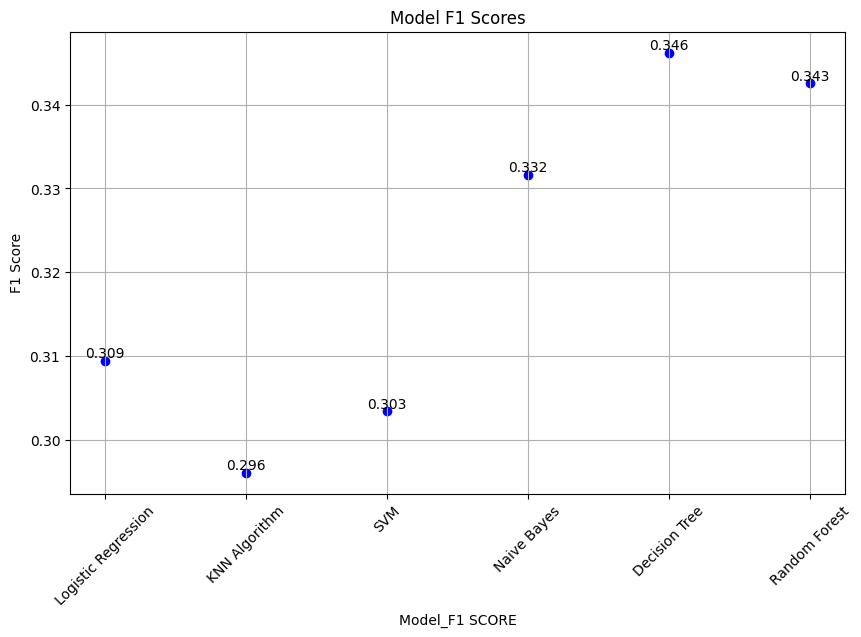

In [110]:
# F1 SCORE PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
f1_scores = [logistic_metrics[0], knn_metrics[0], svm_metrics[0], naivebayes_metrics[0], dt_metrics[0], rf_metrics[0]]

plt.figure(figsize=(10, 6))
plt.scatter(models, f1_scores, color='blue', marker='o')

plt.xlabel('Model_F1 SCORE')
plt.ylabel('F1 Score')
plt.title('Model F1 Scores')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], f1_scores[i], f"{f1_scores[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

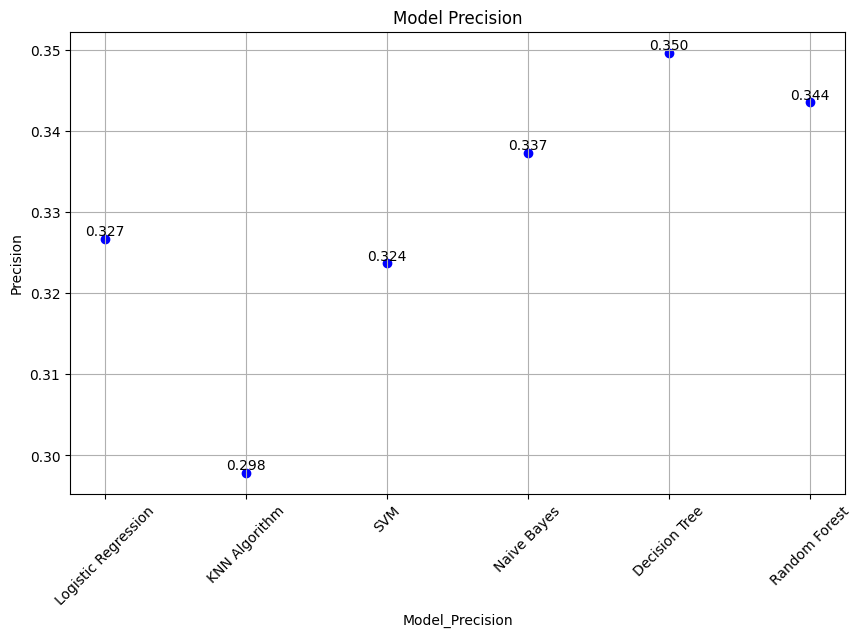

In [111]:
# Precision PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Precision = [logistic_metrics[1], knn_metrics[1], svm_metrics[1], naivebayes_metrics[1], dt_metrics[1], rf_metrics[1]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Precision, color='blue', marker='o')

plt.xlabel('Model_Precision')
plt.ylabel('Precision')
plt.title('Model Precision')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Precision[i], f"{Precision[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

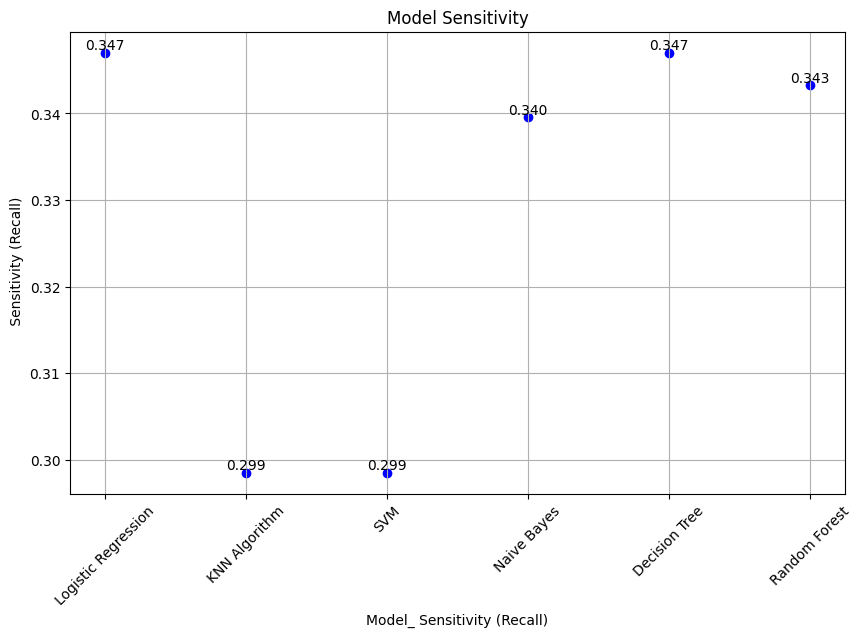

In [112]:
#  Sensitivity (Recall) PLOT
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Sensitivity = [logistic_metrics[2], knn_metrics[2], svm_metrics[2], naivebayes_metrics[2], dt_metrics[2], rf_metrics[2]]

plt.figure(figsize=(10, 6))
plt.scatter(models, Sensitivity, color='blue', marker='o')

plt.xlabel('Model_ Sensitivity (Recall)')
plt.ylabel(' Sensitivity (Recall)')
plt.title('Model Sensitivity')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Sensitivity[i], f"{Sensitivity[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()

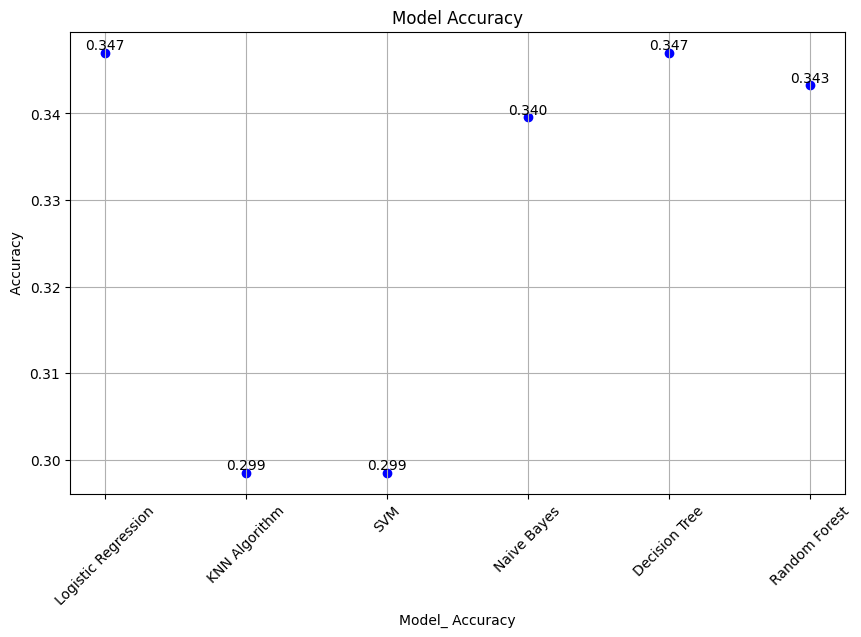

In [113]:
#  ACCURACY PLOT
import matplotlib.pyplot as plt
#accuracy_variables = [accuracyLG, accuracyKNN, accuracySVM, accuracyNaiveBayes, accuracyDT, accuracyRF]
models = ['Logistic Regression', 'KNN Algorithm', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest']
Accuracy_variable = [accuracyLG, accuracyKNN, accuracySVM, accuracyNaiveBayes, accuracyDT, accuracyRF]

plt.figure(figsize=(10, 6))
plt.scatter(models, Accuracy_variable, color='blue', marker='o')

plt.xlabel('Model_ Accuracy')
plt.ylabel(' Accuracy ')
plt.title('Model Accuracy')
plt.xticks(rotation=45)

for i in range(len(models)):
    plt.text(models[i], Accuracy_variable[i], f"{Accuracy_variable[i]:.3f}", ha='center', va='bottom')
plt.grid(True)
plt.show()